In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("training_data_small.csv")

In [3]:
df.head()

,LATITUDE,LONGITUDE,AGE,YEARS_WITH_COMPANY,ANNUAL_KILOMETERS,DAILY_KILOMETERS,YEARS_LICENSED,VEHICLE_YEAR,NUMBER_OF_DRIVERS,NUMBER_OF_VEHICLES,...,INCURRED_LOSS_DCPD,GENDER,DRIVER_MARTIAL_STATUS,DRIVER_TRAINING_IND,VEHICLE_AGE,YEARS_SINCE_AT_FAULT_CLAIM,YEARS_SINCE_NOT_AT_FAULT_CLAIM,YEARS_SINCE_MINOR_CONVICTION,YEARS_SINCE_MAJOR_CONVICTION,YEARS_SINCE_SERIOUS_CONVICTION
0,45.628860,-82.998975,61.0,8.0,12000.0,2.0,39.0,2004.0,1.0,NaN,...,0,F,S,N,12.0,0.0,0.0,NaN,NaN,NaN
1,45.936701,-79.128749,45.0,5.0,13000.0,9.0,25.0,2006.0,1.0,2.0,...,0,M,M,N,7.0,NaN,NaN,NaN,NaN,NaN
2,49.569043,-82.735914,52.0,9.0,12000.0,1.0,32.0,2005.0,2.0,NaN,...,0,F,M,N,8.0,NaN,2.0,NaN,NaN,NaN
3,44.014425,-77.216511,51.0,8.0,10000.0,5.0,31.0,2005.0,2.0,2.0,...,0,F,NaN,N,8.0,4.0,NaN,NaN,NaN,NaN
4,45.687426,-77.924946,47.0,3.0,12000.0,5.0,24.0,2002.0,1.0,2.0,...,0,F,M,N,15.0,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 34 columns):
LATITUDE                          98392 non-null float64
LONGITUDE                         95702 non-null float64
AGE                               99214 non-null float64
YEARS_WITH_COMPANY                98794 non-null float64
ANNUAL_KILOMETERS                 95455 non-null float64
DAILY_KILOMETERS                  98643 non-null float64
YEARS_LICENSED                    98506 non-null float64
VEHICLE_YEAR                      96208 non-null float64
NUMBER_OF_DRIVERS                 96235 non-null float64
NUMBER_OF_VEHICLES                91029 non-null float64
PRIOR_COMPANY                     98769 non-null float64
DEDUCTIBLE_COLLISION              98341 non-null float64
DEDUCTIBLE_COMPREHENSIVE          99015 non-null float64
DEDUCTIBLE_DCPD                   90966 non-null float64
PAYMENT_METHOD                    85583 non-null float64
AT_FAULT_CLAIMS                   9

In [26]:
df.drop(["YEARS_SINCE_AT_FAULT_CLAIM","YEARS_SINCE_NOT_AT_FAULT_CLAIM","YEARS_SINCE_MINOR_CONVICTION","YEARS_SINCE_MAJOR_CONVICTION","YEARS_SINCE_SERIOUS_CONVICTION"],inplace=True,axis=1)

(array([  6.00000000e+00,   2.00000000e+00,   1.06000000e+02,
          1.28900000e+03,   1.58640000e+04,   5.31390000e+04,
          2.60300000e+04,   2.48900000e+03,   2.69000000e+02,
          2.00000000e+01]),
 array([  8. ,  15.3,  22.6,  29.9,  37.2,  44.5,  51.8,  59.1,  66.4,
         73.7,  81. ]),
 <a list of 10 Patch objects>)

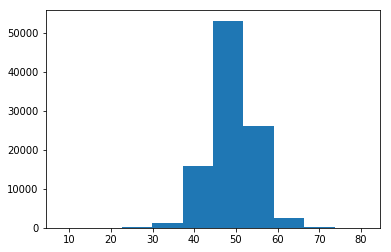

In [24]:
plt.hist(df["AGE"].dropna())

TypeError: '<' not supported between instances of 'NoneType' and 'float'

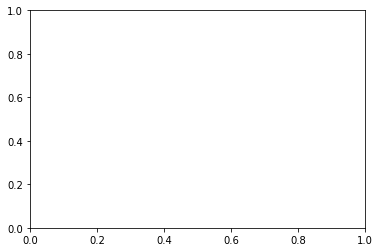

In [19]:
plt.hist(df["ANNUAL_KILOMETERS"].dropna(inplace=True))

### Incurred Losses

In [29]:
ICL = df[["INCURRED_LOSS_COLLISION", "INCURRED_LOSS_DCPD", "INCURRED_LOSS_COMPREHENSIVE"]].copy()

“Coverage against perils other than collision or upset”, previously called Comprehensive, protects you from costs to repair damage to your vehicle from unexpected situations such as fire, theft, vandalism or natural disasters.

Collision and Upset coverage protects you from costs to repair damage to your vehicle caused by impact with another vehicle or an object such as a guardrail.

DCPD-provides you with compensation when you or your car is damaged in an accident where you are not at fault. 

In [30]:
ICL.describe()

,INCURRED_LOSS_COLLISION,INCURRED_LOSS_DCPD,INCURRED_LOSS_COMPREHENSIVE
count,100000.000000,100000.000000,100000.000000
mean,822.448930,888.085790,2031.946800
std,3657.800947,3853.230232,8792.289041
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,86659.000000,25641.000000,74442.000000


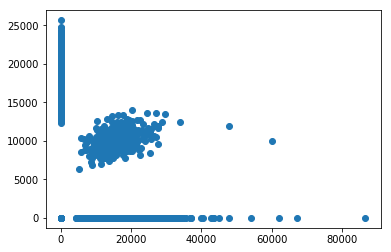

In [8]:
plt.scatter(df["INCURRED_LOSS_COLLISION"],df["INCURRED_LOSS_DCPD"])

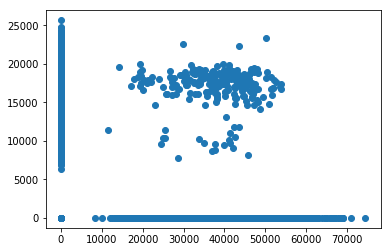

In [9]:
plt.scatter(df["INCURRED_LOSS_COMPREHENSIVE"],df["INCURRED_LOSS_DCPD"])

### Relationship with Deductible

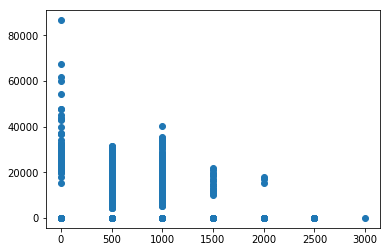

In [12]:
plt.scatter(df["DEDUCTIBLE_COLLISION"],df["INCURRED_LOSS_COLLISION"])

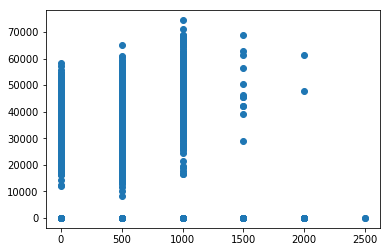

In [13]:
plt.scatter(df["DEDUCTIBLE_COMPREHENSIVE"],df["INCURRED_LOSS_COMPREHENSIVE"])